# Project: Investigate a Dataset - [European Soccer Database]

By: Mayowa Shobande

## Table of Contents

* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Conclusions

## Introduction 

### Dataset Description

This is an European Soccer dataset for Seasons 2008 to 2016. The dataset contains 
* 7 Tables 
* 11 Countries
* 11 Leagues
* Over 10,000 Players
* Over 25,000 Matches
* Over 200 Teams

### Question(s) for Analysis

1. What teams had the highest goals in all the seasons?
2. What is the ditribution of matches played during the seasons?
3. What is the goals to game ratio of each team?
4. Which players had the most penalties?

## Data Wrangling

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

#### Importing the Dataset

In [3]:
con = sqlite3.connect("C:/Users/aser/Downloads/udacity/database.sqlite")
cur = con.cursor()

print("Data imported successfully.")

Data imported successfully.


#### Showing the Tables in the Database

In [4]:
def sql_read(a,b):
    print(a)
    print(b.head())
    print(b.shape)
    print('\n')
   
country = pd.read_sql('select * from country', con)
league = pd.read_sql('select * from league', con)
sql_read("league",league)
match = pd.read_sql('select * from match', con)
sql_read("match",match)
player = pd.read_sql('select * from player', con)
sql_read("player",player)
player_attributes = pd.read_sql('select * from player_attributes', con)
sql_read("player_attributes",player_attributes)
team = pd.read_sql('select * from team', con)
sql_read("team",team)
team_attributes = pd.read_sql('select * from team_attributes', con)
sql_read("team_attributes",team_attributes)

country
      id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy
(11, 2)


league
      id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A
(11, 3)


match
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1 

In [5]:
pd.read_sql('SELECT * FROM sqlite_sequence;', con)

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


In [6]:
team = pd.read_sql('select * from team', con)

team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [7]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


Team table has no empty cells.

In [8]:
team.shape

(299, 5)

Team table has 299 rows and 5 columns.

In [9]:
country = pd.read_sql('select * from country', con)

country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [10]:
country.nunique()

id      11
name    11
dtype: int64

In [11]:
country.shape

(11, 2)

Country table has 11 rows and 2 columns.

In [12]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


Country table has no empty cell.

In [13]:
league = pd.read_sql('select * from league', con)

league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [14]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


League table has no empty cells and it contains 11 rows, 3 columns.

In [15]:
match = pd.read_sql('select * from match', con)

match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [16]:
match.shape

(25979, 115)

In [17]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [18]:
match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

Match table contains 25979 rows and 115 columns.

In [19]:
players = pd.read_sql('select * from player', con)

players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [20]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [21]:
players.shape

(11060, 7)

Players table has 11060 row and 7 columns.

In [22]:
player_attributes = pd.read_sql('select * from player_attributes', con)

player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [23]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [24]:
player_attributes.shape

(183978, 42)

Player attributes table shows details about every player that playeyd in the soccer game.
The table contains 183978 rows and 42 columns.


In [25]:
team_attributes = pd.read_sql('select * from team_attributes', con)

team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [30]:
team_attributes.shape

(1458, 25)

Team attributes table shows details about Teams involved in the soccer game.
It contains 42 columns

#### Converting the tables to dataframe

In [31]:
country = pd.DataFrame(country)
league = pd.DataFrame(league)
match = pd.DataFrame(match)
players = pd.DataFrame(players)
player_attributes = pd.DataFrame(player_attributes)
team = pd.DataFrame(team)
team_attributes = pd.DataFrame(team_attributes)

In [28]:
table = pd.read_sql("""SELECT *  FROM team
          LEFT JOIN match
           on team.team_api_id = match.home_team_api_id""", con)

table.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,country_id,league_id,season,stage,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,9987,673.0,KRC Genk,GEN,1,1,1,2008/2009,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.4,4.2
1,1,9987,673.0,KRC Genk,GEN,200,1,1,2008/2009,3,...,5.00,1.60,3.40,5.00,1.65,3.40,4.60,1.67,3.4,4.5
2,1,9987,673.0,KRC Genk,GEN,263,1,1,2008/2009,5,...,2.63,2.50,3.25,2.50,2.50,3.20,2.50,2.40,3.2,2.6
3,1,9987,673.0,KRC Genk,GEN,281,1,1,2008/2009,7,...,7.50,1.40,4.00,7.00,1.45,4.00,6.50,1.50,3.6,6.5
4,1,9987,673.0,KRC Genk,GEN,299,1,1,2008/2009,9,...,2.40,2.75,3.25,2.25,2.60,3.25,2.45,2.75,3.2,2.3


The above table shows the merged Team table and Match Table.

In [29]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 120 entries, id to BSA
dtypes: float64(97), int64(11), object(12)
memory usage: 23.8+ MB


In the Data Wrangling results, it is shown that the dataset has no null value. So, the data is ready for explorration.

## Exploratory Data Analysis

Here, we will be joining and filtering out tables so we can have the needed data for analysis. We will also drop some columns to make the results in some tables simple for analysis.

#### Create Home Teams Table.

In [32]:
home_team = pd.read_sql("""SELECT team_api_id, team_long_name AS home_team, team_short_name AS HT_name
FROM match AS m 
JOIN team AS t 
ON m.home_team_api_id = t.team_api_id""", con)

home_team.head()

,team_api_id,home_team,HT_name
0,9987,KRC Genk,GEN
1,10000,SV Zulte-Waregem,ZUL
2,9984,KSV Cercle Brugge,CEB
3,9991,KAA Gent,GEN
4,7947,FCV Dender EH,DEN


The above table shows basic details about Home teams in the game.

In [33]:
home_team.isnull()

,team_api_id,home_team,HT_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


#### Create Away Teams Table.

In [34]:
away_team = pd.read_sql("""SELECT team_api_id, team_long_name AS away_team, team_short_name AS AT_name
FROM match AS m 
JOIN team AS t 
ON m.away_team_api_id = t.team_api_id""", con)

away_team.head()

,team_api_id,away_team,AT_name
0,9993,Beerschot AC,BAC
1,9994,Sporting Lokeren,LOK
2,8635,RSC Anderlecht,AND
3,9998,RAEC Mons,MON
4,9985,Standard de Liège,STL


The above table shows basic details about Away teams in the game.

In [35]:
away_team.isnull()

,team_api_id,away_team,AT_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


#### Join Home teams and Away teams tables

In [36]:
team_details = pd.DataFrame(home_team.join(away_team, lsuffix = '_home', rsuffix = '_away'))

team_details.head()

,team_api_id_home,home_team,HT_name,team_api_id_away,away_team,AT_name
0,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
1,10000,SV Zulte-Waregem,ZUL,9994,Sporting Lokeren,LOK
2,9984,KSV Cercle Brugge,CEB,8635,RSC Anderlecht,AND
3,9991,KAA Gent,GEN,9998,RAEC Mons,MON
4,7947,FCV Dender EH,DEN,9985,Standard de Liège,STL


Here, we have some basic details of home teams and away teams in a single table.

#### Now, the steps below are taken to show a table that shows some basic details on the matches played by the home and away teams.

#### Getting details from match table

In [37]:
match_details = match.loc[:, 'id':'away_team_goal']
match_details.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


#### Creating a table to join the details from team_details and match_details

In [38]:
team_match_details = pd.DataFrame(match_details.join(team_details))
team_match_details["date"] = pd.to_datetime(team_match_details["date"] )

team_match_details.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id_home,home_team,HT_name,team_api_id_away,away_team,AT_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,9987,KRC Genk,GEN,9993,Beerschot AC,BAC
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,10000,SV Zulte-Waregem,ZUL,9994,Sporting Lokeren,LOK
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,9984,KSV Cercle Brugge,CEB,8635,RSC Anderlecht,AND
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,9991,KAA Gent,GEN,9998,RAEC Mons,MON
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,7947,FCV Dender EH,DEN,9985,Standard de Liège,STL


Now, we have a table that show match details about every team.

#### Selecting columns from team_match_details useful for more analysis

In [39]:
team_match_details = team_match_details.iloc[:, np.r_[0:8,12,13,9,10,8,15,16]]

team_match_details.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,home_team,HT_name,home_team_goal,away_team_goal,away_team_api_id,away_team,AT_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,KRC Genk,GEN,1,1,9993,Beerschot AC,BAC
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,SV Zulte-Waregem,ZUL,0,0,9994,Sporting Lokeren,LOK
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,KSV Cercle Brugge,CEB,0,3,8635,RSC Anderlecht,AND
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,KAA Gent,GEN,5,0,9998,RAEC Mons,MON
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,FCV Dender EH,DEN,1,3,9985,Standard de Liège,STL


#### Selecting columns from Country and League tables for more analysis.

In [40]:
country = country.rename(columns = {'id':'country_id'})
country = country.rename(columns ={'name':'country'})

country

,country_id,country
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [41]:
team_match_details = team_match_details.join(country.set_index('country_id'), on = 'country_id')

team_match_details.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,home_team,HT_name,home_team_goal,away_team_goal,away_team_api_id,away_team,AT_name,country
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,KRC Genk,GEN,1,1,9993,Beerschot AC,BAC,Belgium
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,SV Zulte-Waregem,ZUL,0,0,9994,Sporting Lokeren,LOK,Belgium
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,KSV Cercle Brugge,CEB,0,3,8635,RSC Anderlecht,AND,Belgium
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,KAA Gent,GEN,5,0,9998,RAEC Mons,MON,Belgium
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,FCV Dender EH,DEN,1,3,9985,Standard de Liège,STL,Belgium


In [42]:
league = league.rename(columns = {'id':'league_id'})
league = league.rename(columns ={'name':'league'})

league

,league_id,country_id,league
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [43]:
league = league.drop(['country_id'], axis = 1)

league

,league_id,league
0,1,Belgium Jupiler League
1,1729,England Premier League
2,4769,France Ligue 1
3,7809,Germany 1. Bundesliga
4,10257,Italy Serie A
5,13274,Netherlands Eredivisie
6,15722,Poland Ekstraklasa
7,17642,Portugal Liga ZON Sagres
8,19694,Scotland Premier League
9,21518,Spain LIGA BBVA


In [44]:
team_match_details = team_match_details.join(league.set_index('league_id'), on = 'league_id')

team_match_details.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,home_team,HT_name,home_team_goal,away_team_goal,away_team_api_id,away_team,AT_name,country,league
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,KRC Genk,GEN,1,1,9993,Beerschot AC,BAC,Belgium,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,SV Zulte-Waregem,ZUL,0,0,9994,Sporting Lokeren,LOK,Belgium,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,KSV Cercle Brugge,CEB,0,3,8635,RSC Anderlecht,AND,Belgium,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,KAA Gent,GEN,5,0,9998,RAEC Mons,MON,Belgium,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,FCV Dender EH,DEN,1,3,9985,Standard de Liège,STL,Belgium,Belgium Jupiler League


League and country is included in the table above.

#### Creating and joining a winning team column to 'team_match_details' table.

In [45]:
conditions = [(team_match_details['home_team_goal'] > team_match_details['away_team_goal']), 
              (team_match_details['home_team_goal'] < match_details['away_team_goal']),
             (team_match_details['home_team_goal'] == match_details['away_team_goal'])
             ]
values = [team_match_details['home_team'], team_match_details['away_team'], 'Draw']

team_match_details['winning_team'] = np.select(conditions, values)

team_match_details.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,home_team,HT_name,home_team_goal,away_team_goal,away_team_api_id,away_team,AT_name,country,league,winning_team
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,KRC Genk,GEN,1,1,9993,Beerschot AC,BAC,Belgium,Belgium Jupiler League,Draw
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,SV Zulte-Waregem,ZUL,0,0,9994,Sporting Lokeren,LOK,Belgium,Belgium Jupiler League,Draw
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,KSV Cercle Brugge,CEB,0,3,8635,RSC Anderlecht,AND,Belgium,Belgium Jupiler League,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,KAA Gent,GEN,5,0,9998,RAEC Mons,MON,Belgium,Belgium Jupiler League,KAA Gent
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,FCV Dender EH,DEN,1,3,9985,Standard de Liège,STL,Belgium,Belgium Jupiler League,Standard de Liège


Here, we created and added a new column "winning_team" to the table to show the team that wins every match.

In [46]:
team_match_details = team_match_details.iloc[:, np.r_[0,6,3,5,15,16,4,7,8,9,10,11,14,13,12,17]]

team_match_details.head()

,id,match_api_id,season,date,country,league,stage,home_team_api_id,home_team,HT_name,home_team_goal,away_team_goal,AT_name,away_team,away_team_api_id,winning_team
0,1,492473,2008/2009,2008-08-17,Belgium,Belgium Jupiler League,1,9987,KRC Genk,GEN,1,1,BAC,Beerschot AC,9993,Draw
1,2,492474,2008/2009,2008-08-16,Belgium,Belgium Jupiler League,1,10000,SV Zulte-Waregem,ZUL,0,0,LOK,Sporting Lokeren,9994,Draw
2,3,492475,2008/2009,2008-08-16,Belgium,Belgium Jupiler League,1,9984,KSV Cercle Brugge,CEB,0,3,AND,RSC Anderlecht,8635,RSC Anderlecht
3,4,492476,2008/2009,2008-08-17,Belgium,Belgium Jupiler League,1,9991,KAA Gent,GEN,5,0,MON,RAEC Mons,9998,KAA Gent
4,5,492477,2008/2009,2008-08-16,Belgium,Belgium Jupiler League,1,7947,FCV Dender EH,DEN,1,3,STL,Standard de Liège,9985,Standard de Liège


This table shows the needed match details for each team.

## Research Question 1 (Which teams scored the most goals?)

#### The steps  below shows the total number of goals by each team.

Goals by home teams.

In [47]:
home_team_goals = team_match_details.iloc[:, np.r_[0,7,8,9,10]]

home_team_goals.head()


,id,home_team_api_id,home_team,HT_name,home_team_goal
0,1,9987,KRC Genk,GEN,1
1,2,10000,SV Zulte-Waregem,ZUL,0
2,3,9984,KSV Cercle Brugge,CEB,0
3,4,9991,KAA Gent,GEN,5
4,5,7947,FCV Dender EH,DEN,1


Goals by away teams.

In [48]:
away_team_goals = team_match_details.iloc[:, np.r_[0,14,12,13,11]]

away_team_goals.head()

,id,away_team_api_id,AT_name,away_team,away_team_goal
0,1,9993,BAC,Beerschot AC,1
1,2,9994,LOK,Sporting Lokeren,0
2,3,8635,AND,RSC Anderlecht,3
3,4,9998,MON,RAEC Mons,0
4,5,9985,STL,Standard de Liège,3


Sum of goals scored by the home teams.

In [49]:
home_team_goals = home_team_goals.groupby('home_team')['home_team_goal'].sum().reset_index(name = "total_goals").sort_values("total_goals", axis = 0, ascending = False)

home_team_goals.head()

,home_team,total_goals
211,Real Madrid CF,505
75,FC Barcelona,495
49,Celtic,389
77,FC Bayern Munich,382
184,PSV,370


Sum of goals scored by away teams.

In [50]:
away_team_goals = away_team_goals.groupby('away_team')['away_team_goal'].sum().reset_index(name = "total_goals").sort_values("total_goals", axis = 0, ascending = False)

away_team_goals.head()

,away_team,total_goals
75,FC Barcelona,354
211,Real Madrid CF,338
49,Celtic,306
15,Ajax,287
184,PSV,282


Below are the tables for the sum of home and away teams goals

In [51]:
team_goals = pd.DataFrame(home_team_goals.join(away_team_goals, lsuffix = '_home', rsuffix = '_away'))

team_goals

,home_team,total_goals_home,away_team,total_goals_away
211,Real Madrid CF,505,Real Madrid CF,338
75,FC Barcelona,495,FC Barcelona,354
49,Celtic,389,Celtic,306
77,FC Bayern Munich,382,FC Bayern Munich,271
184,PSV,370,PSV,282
161,Manchester City,365,Manchester City,241
15,Ajax,360,Ajax,287
76,FC Basel,344,FC Basel,275
162,Manchester United,338,Manchester United,244
51,Chelsea,333,Chelsea,250


In [52]:
team_goals['total_goals'] = team_goals['total_goals_home'] + team_goals['total_goals_away']

team_goals.head()

,home_team,total_goals_home,away_team,total_goals_away,total_goals
211,Real Madrid CF,505,Real Madrid CF,338,843
75,FC Barcelona,495,FC Barcelona,354,849
49,Celtic,389,Celtic,306,695
77,FC Bayern Munich,382,FC Bayern Munich,271,653
184,PSV,370,PSV,282,652


In [53]:
team_goals = team_goals.rename(columns = {'home_team':'team'})

team_goals.head()

,team,total_goals_home,away_team,total_goals_away,total_goals
211,Real Madrid CF,505,Real Madrid CF,338,843
75,FC Barcelona,495,FC Barcelona,354,849
49,Celtic,389,Celtic,306,695
77,FC Bayern Munich,382,FC Bayern Munich,271,653
184,PSV,370,PSV,282,652


In [54]:
team_goals = team_goals.iloc[:, np.r_[0,4]]

team_goals.head()

,team,total_goals
211,Real Madrid CF,843
75,FC Barcelona,849
49,Celtic,695
77,FC Bayern Munich,653
184,PSV,652


In [55]:
team_goals.head().sort = False

team_goals.head()

,team,total_goals
211,Real Madrid CF,843
75,FC Barcelona,849
49,Celtic,695
77,FC Bayern Munich,653
184,PSV,652


In [56]:
team_goals.sort_values("total_goals", axis = 0, ascending = False)

,team,total_goals
75,FC Barcelona,849
211,Real Madrid CF,843
49,Celtic,695
77,FC Bayern Munich,653
184,PSV,652
15,Ajax,647
76,FC Basel,619
161,Manchester City,606
51,Chelsea,583
162,Manchester United,582


The above table shows the total number of goals acquired by each team during the 8 seasons of the European soccer game.

From the result above, the team with the highest goal is FC Barcelona acquiring 843 goals. 

#### Visualization (BarChart) for the top five teams with the highest goals in all the seasons

Text(0.5, 1.0, 'Total Goals of the Top Five Teams')

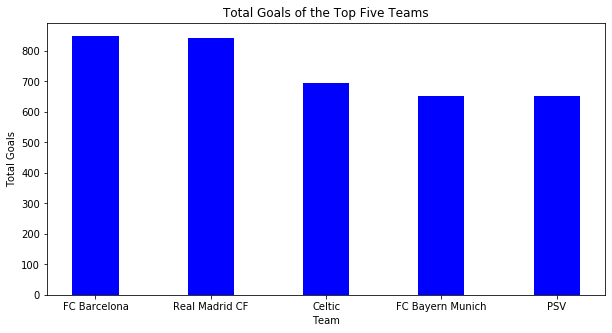

In [57]:
fig = plt.figure(figsize = (10, 5))
team_goals_plt = team_goals.sort_values("total_goals", axis = 0, ascending = False).head()

plt.bar(team_goals_plt['team'], team_goals_plt['total_goals'], color = 'blue', width = 0.4)
plt.xlabel("Team")
plt.ylabel("Total Goals")
plt.title("Total Goals of the Top Five Teams")

To visualize the top  teams with the hghest goals, Barchart is used because it allows for easy comparison values.

## Research Question 2 (What is the ditribution of matches played during the seasons?)

#### The steps below show the details for the matches played by each team.
#### We will also get the ratio if goals to number of games played by each team.

#### Home teams matches

In [58]:
home_team = pd.DataFrame(team_match_details.groupby('home_team')['home_team_api_id'].count().reset_index(name = "total_games").sort_values("total_games", axis = 0, ascending = False))

home_team.head()

,home_team,total_games
51,Chelsea,152
22,Athletic Club de Bilbao,152
186,Paris Saint-Germain,152
256,Sunderland,152
180,Olympique de Marseille,152


#### Away teams matches

In [59]:
away_team = team_match_details.groupby('away_team')['away_team_api_id'].count().reset_index(name = "total_games").sort_values("total_games", axis = 0, ascending = False)

away_team.head()

,away_team,total_games
167,Motherwell,153
51,Chelsea,152
164,Milan,152
256,Sunderland,152
180,Olympique de Marseille,152


In [60]:
team_match = pd.DataFrame(home_team.join(away_team, lsuffix = '_home', rsuffix = '_away'))

team_match.head()

,home_team,total_games_home,away_team,total_games_away
51,Chelsea,152,Chelsea,152
22,Athletic Club de Bilbao,152,Athletic Club de Bilbao,152
186,Paris Saint-Germain,152,Paris Saint-Germain,152
256,Sunderland,152,Sunderland,152
180,Olympique de Marseille,152,Olympique de Marseille,152


In [61]:
team_match['total_match'] = team_match['total_games_home'] + team_match['total_games_away']

team_match.head()

,home_team,total_games_home,away_team,total_games_away,total_match
51,Chelsea,152,Chelsea,152,304
22,Athletic Club de Bilbao,152,Athletic Club de Bilbao,152,304
186,Paris Saint-Germain,152,Paris Saint-Germain,152,304
256,Sunderland,152,Sunderland,152,304
180,Olympique de Marseille,152,Olympique de Marseille,152,304


In [62]:
team_match = team_match.rename(columns = {'home_team':'team'})

team_match.head()

,team,total_games_home,away_team,total_games_away,total_match
51,Chelsea,152,Chelsea,152,304
22,Athletic Club de Bilbao,152,Athletic Club de Bilbao,152,304
186,Paris Saint-Germain,152,Paris Saint-Germain,152,304
256,Sunderland,152,Sunderland,152,304
180,Olympique de Marseille,152,Olympique de Marseille,152,304


Renamed "home_team" column as "team"

In [63]:
team_match = team_match.iloc[:, np.r_[0,4]]

team_match.head()

,team,total_match
51,Chelsea,304
22,Athletic Club de Bilbao,304
186,Paris Saint-Germain,304
256,Sunderland,304
180,Olympique de Marseille,304


In [64]:
team_match.sort_values("total_match", axis = 0, ascending = False)


,team,total_match
51,Chelsea,304
252,Stade Rennais FC,304
146,LOSC Lille,304
23,Atlético Madrid,304
177,OGC Nice,304
61,Dundee United,304
202,RCD Espanyol,304
11,AS Saint-Étienne,304
211,Real Madrid CF,304
13,Aberdeen,304


From the above table, the highest number of matches played by some teams is 304 while the least number some teams played matches was 30.

#### Visualization (Distribution Plot) to show the distribution of matches played by all teams.

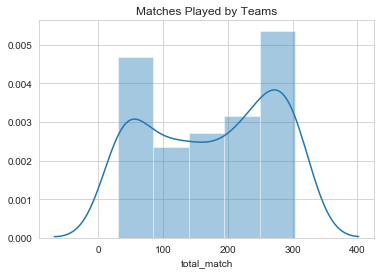

In [65]:
x = team_match.sort_values("team", axis = 0, ascending = False)
sns.set_style('whitegrid')
sns.distplot(x['total_match'])
plt.title('Matches Played by Teams')

plt.show()

Displot is used to get the distribution of the matches played by all teams because distplot is basically used for univariant set of observations and visualizes through a histogram.

The distribution plot above shows that the teams that played the highest number of matches are more than the teams that played the least number of matches.

## Research Question 3 (What is the goals to game ratio of each team?)

#### Relationship between team goals and team matches

In [66]:
team_table = pd.DataFrame(team_match.join(team_goals, lsuffix = '_home', rsuffix = '_away'))

team_table.head()

,team_home,total_match,team_away,total_goals
51,Chelsea,304,Chelsea,583
22,Athletic Club de Bilbao,304,Athletic Club de Bilbao,415
186,Paris Saint-Germain,304,Paris Saint-Germain,568
256,Sunderland,304,Sunderland,333
180,Olympique de Marseille,304,Olympique de Marseille,462


In [67]:
match_table = team_match.join(team_goals.set_index('team'), on = 'team').sort_values("total_goals", axis = 0, ascending = False).head()

match_table

,team,total_match,total_goals
75,FC Barcelona,304,849
211,Real Madrid CF,304,843
49,Celtic,304,695
77,FC Bayern Munich,272,653
184,PSV,272,652


In [68]:
match_table.sort_values("total_goals", axis = 0, ascending = False).head()

,team,total_match,total_goals
75,FC Barcelona,304,849
211,Real Madrid CF,304,843
49,Celtic,304,695
77,FC Bayern Munich,272,653
184,PSV,272,652


Here, we have a single table that shows the number of matches played by each team and the number of goals acquired by each team.

#### Now we want to get the ratio of goals acquired by each team to number of matches plaed by each team

In [69]:
match_table['match_goals'] = pd.DataFrame(match_table['total_goals'] / match_table['total_match'])

match_table.head()

,team,total_match,total_goals,match_goals
75,FC Barcelona,304,849,2.792763
211,Real Madrid CF,304,843,2.773026
49,Celtic,304,695,2.286184
77,FC Bayern Munich,272,653,2.400735
184,PSV,272,652,2.397059


In [70]:
match_table.sort_values("match_goals", axis = 0, ascending = False).head()

,team,total_match,total_goals,match_goals
75,FC Barcelona,304,849,2.792763
211,Real Madrid CF,304,843,2.773026
77,FC Bayern Munich,272,653,2.400735
184,PSV,272,652,2.397059
49,Celtic,304,695,2.286184


The above table shows the goal scored by each team per match.

From the result above, FC Barcelona scored the highest goals per match in all the seasons.

#### Visualization (Barplot) for the top five teams goals per match

Text(0.5, 1.0, 'Total Goals of the Top Five Teams')

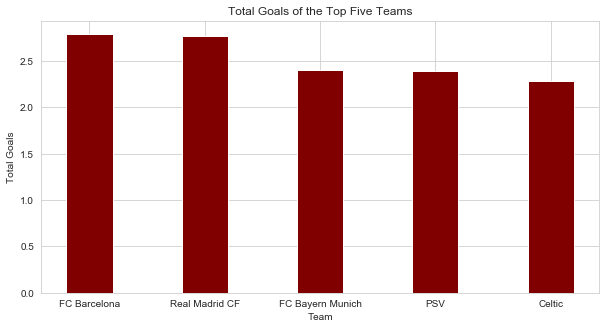

In [74]:
fig = plt.figure(figsize = (10, 5))
match_table_plt = match_table.sort_values("match_goals", axis = 0, ascending = False).head()

plt.bar(match_table_plt['team'], match_table_plt['match_goals'], color = 'maroon', width = 0.4)
plt.xlabel("Team")
plt.ylabel("Total Goals")
plt.title("Total Goals of the Top Five Teams")

Creating Barchart Using Functions

In [78]:
def bar_plot(df, x, y, xname, yname, title):
    fig = plt.figure(figsize = (10, 5))
    plt.bar(df[x], df[y], color = 'red', width = 0.4)
    plt.xlabel = (xname)
    plt.ylabel = (yname)
    plt.title = (title)

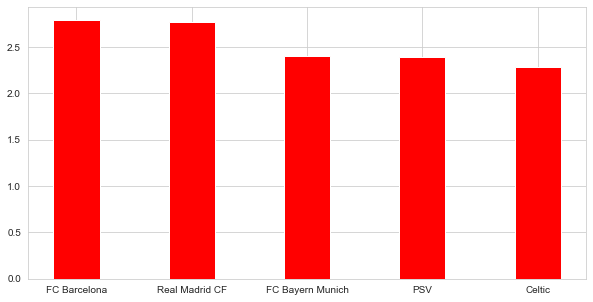

In [79]:
m = match_table.sort_values('match_goals', axis = 0, ascending = False).head()

bar_plot(m, 'team', 'match_goals', 'Teams', 'Teams goals per games', 'Top five teams by goals per game')

To show the goals per match of the top five teams of the seasons, the Barplot is used because it conveys relational information quickly.  

## Research Question 4 (Which players had the most penalties?)

#### Loading the table to show  penalties won by players

In [75]:
player_penalties = pd.read_sql("""SELECT pa.player_api_id, player_name AS player, penalties AS penalty
FROM player AS p
JOIN player_attributes AS pa
ON p.player_api_id = pa.player_api_id
GROUP BY player_name
ORDER BY penalties DESC""", con)

player_penalties.head()

,player_api_id,player,penalty
0,39225,Rickie Lambert,96
1,108808,Mario Balotelli,92
2,30909,David Villa,92
3,35724,Zlatan Ibrahimovic,91
4,30699,Michael Ballack,91


In [76]:
player_penalties.sort_values("penalty", axis = 0, ascending = False)

,player_api_id,player,penalty
0,39225,Rickie Lambert,96
2,30909,David Villa,92
1,108808,Mario Balotelli,92
3,35724,Zlatan Ibrahimovic,91
4,30699,Michael Ballack,91
8,26099,Paolo Maldini,90
10,23185,Graham Alexander,90
9,24846,Leighton Baines,90
11,38248,Dario Smoje,90
7,34602,Ruud van Nistelrooy,90


The above table shows the result for players that had the most penalties.

From the result, Rickie Lambert had the most penalties.

#### Visualization (Barplot) for Penalties scored by players

Text(0.5, 1.0, 'Penalties Scored by Players')

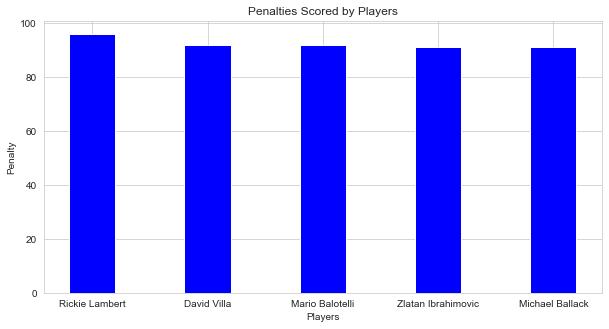

In [77]:
fig = plt.figure(figsize = (10, 5))
player_penalties_plt = player_penalties.sort_values("penalty", axis = 0, ascending = False).head()

plt.bar(player_penalties_plt['player'], player_penalties_plt['penalty'], color = 'blue', width = 0.4)
plt.xlabel("Players")
plt.ylabel("Penalty")
plt.title("Penalties Scored by Players")

The barplot is used to visualize the players with the highest goal because it estimates key values at a glance.

## Conclusion

From the above analysis, it is concluded that FC Barcelona is the team with the highest number of goals and relatively the team with the highest number of matches played during the European Soccer 2008/2009 - 2015/2016.
Also, Rickie Lambert is the player with the highest penalty scorer for the seasons.

## Limitations

I wanted the know the team each player belongs to but there was no enough information in the dataset for that.

### Reference Links

1. GEEKSFORGEEKS - Bar Plot Matplotlib (https:www.geeksforgeeks.org/bar-plot-in-matplotlib/)
2. GEEKSFORGEEKS - Seaborn Distribution plots (https://www.geeksforgeeks.org/seaborn-distriution-plots/)
3. Accessing SQLite Databases Using Python and Pandas (https://datacarpentry.org/python-ecology-lesson/09-working-with-sql/index.html)
4. sqlitedict 2.0.0 (https://pypi.org/project/sqlitedict?s=09)